# CHAPTER 2

In [1]:
library(tidyverse)
library(gridExtra)
library(readr)
library(forecast)
library(repr) # Resizing the plots in jupyter
library(rugarch) # For multiplying lags

options(repr.plot.width=8, repr.plot.height=2.5)

setwd("C:/Users/larsn/Documents/GitHub/Applied-Econometric-Time-Series-WE")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.7
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: parallel

Attaching package: 'rugarch'

The following object is masked from 'package:purrr':

    reduce

The following object is masked from 'package:stats':

    sigma



In [2]:
SIM_2 <- read_delim("Data/SIM_2.csv", ";", 
                    escape_double = FALSE, locale = locale(decimal_mark = ","), 
                    trim_ws = TRUE)
head(SIM_2)

Parsed with column specification:
cols(
  OBS = col_integer(),
  Y1 = col_double(),
  Y2 = col_double(),
  Y3 = col_double()
)


OBS,Y1,Y2,Y3
1,0.60805,3.96768,0.04856
2,-0.29348,-2.23051,0.14200
3,-0.68832,1.69602,-0.10089
4,-0.86596,-1.61072,-0.50346
5,0.66890,3.79400,-0.50044
6,0.65094,-4.81795,0.15233


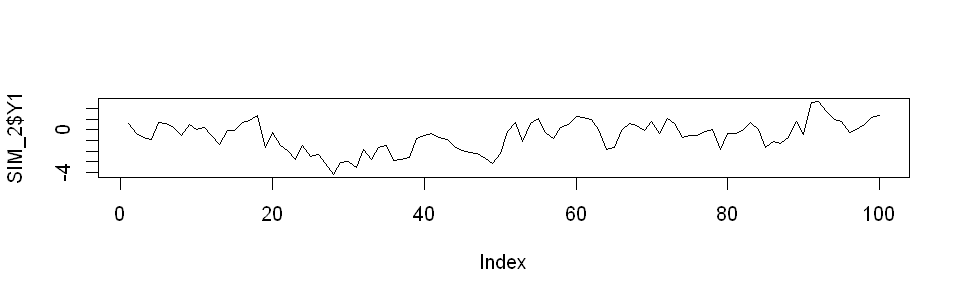

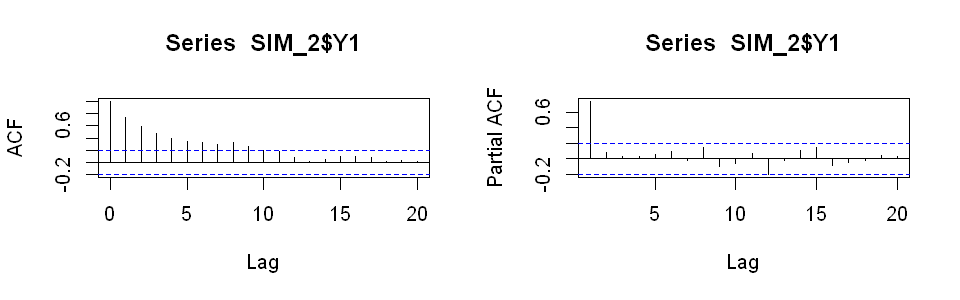

In [3]:
plot(SIM_2$Y1, type="l")
par(mfrow=c(1,2))
acf(SIM_2$Y1)
pacf(SIM_2$Y1)

In [4]:
m1 <- arima(SIM_2$Y1, order = c(1,0,0), include.mean=FALSE)
m1


Call:
arima(x = SIM_2$Y1, order = c(1, 0, 0), include.mean = FALSE)

Coefficients:
         ar1
      0.7840
s.e.  0.0606

sigma^2 estimated as 0.8525:  log likelihood = -134.39,  aic = 272.78

In [5]:
Box.test(m1$residuals,lag=8,type="Ljung-Box")
Box.test(m1$residuals,lag=16,type="Ljung-Box")
Box.test(m1$residuals,lag=24,type="Ljung-Box")


	Box-Ljung test

data:  m1$residuals
X-squared = 6.3024, df = 8, p-value = 0.6134



	Box-Ljung test

data:  m1$residuals
X-squared = 15.666, df = 16, p-value = 0.4765



	Box-Ljung test

data:  m1$residuals
X-squared = 21.528, df = 24, p-value = 0.6074


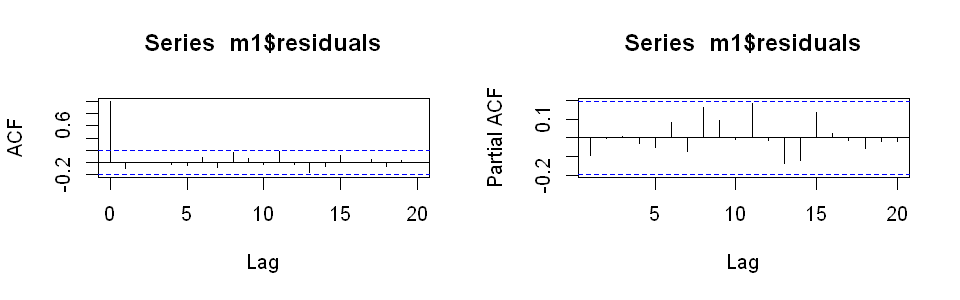

In [6]:
par(mfrow=c(1,2))
acf(m1$residuals)
pacf(m1$residuals)

In [7]:
m2 <- arima(SIM_2$Y1, order = c(1,0,12), fixed=c(NA,0,0,0,0,0,0,0,0,0,0,0,NA), include.mean=FALSE)
m2


Call:
arima(x = SIM_2$Y1, order = c(1, 0, 12), include.mean = FALSE, fixed = c(NA, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, NA))

Coefficients:
         ar1  ma1  ma2  ma3  ma4  ma5  ma6  ma7  ma8  ma9  ma10  ma11     ma12
      0.7874    0    0    0    0    0    0    0    0    0     0     0  -0.0260
s.e.  0.0626    0    0    0    0    0    0    0    0    0     0     0   0.1314

sigma^2 estimated as 0.852:  log likelihood = -134.37,  aic = 274.74

Manually calculate AIC

In [8]:
T <- 99
SSR <- sum(m1$residuals^2)
n <- 2

AIC <- T * log(SSR) + 2*n
AIC

[1] 444.1133

## Next series

In [9]:
m2_1 <- arima(SIM_2$Y2, order = c(1,0,0))
m2_2 <- arima(SIM_2$Y2, order = c(1,0,1))
m2_3 <- arima(SIM_2$Y2, order = c(2,0,0))

m2_1
m2_2
m2_3


Call:
arima(x = SIM_2$Y2, order = c(1, 0, 0))

Coefficients:
          ar1  intercept
      -0.8502     0.0006
s.e.   0.0524     0.0689

sigma^2 estimated as 1.61:  log likelihood = -166.35,  aic = 338.7


Call:
arima(x = SIM_2$Y2, order = c(1, 0, 1))

Coefficients:
          ar1      ma1  intercept
      -0.7077  -0.6701    -0.0085
s.e.   0.0785   0.0955     0.0219

sigma^2 estimated as 1.225:  log likelihood = -153.08,  aic = 314.16


Call:
arima(x = SIM_2$Y2, order = c(2, 0, 0))

Coefficients:
          ar1      ar2  intercept
      -1.1776  -0.3842    -0.0030
s.e.   0.0928   0.0929     0.0461

sigma^2 estimated as 1.372:  log likelihood = -158.5,  aic = 325.01

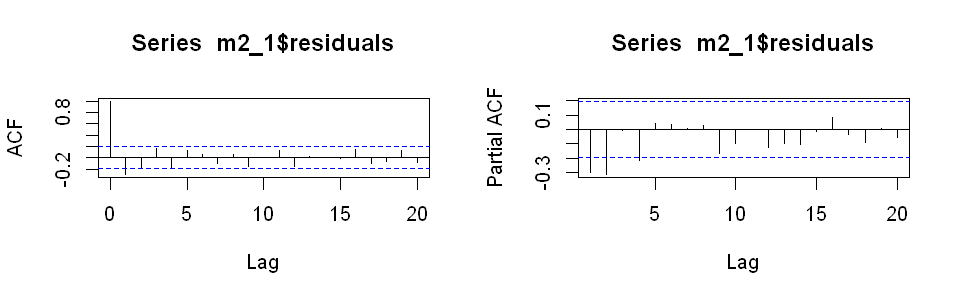

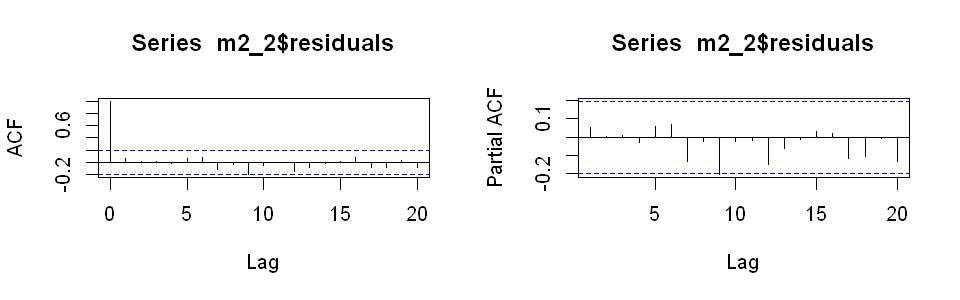

In [10]:
par(mfrow=c(1,2))
acf(m2_1$residuals)
pacf(m2_1$residuals)

par(mfrow=c(1,2))
acf(m2_2$residuals)
pacf(m2_2$residuals)

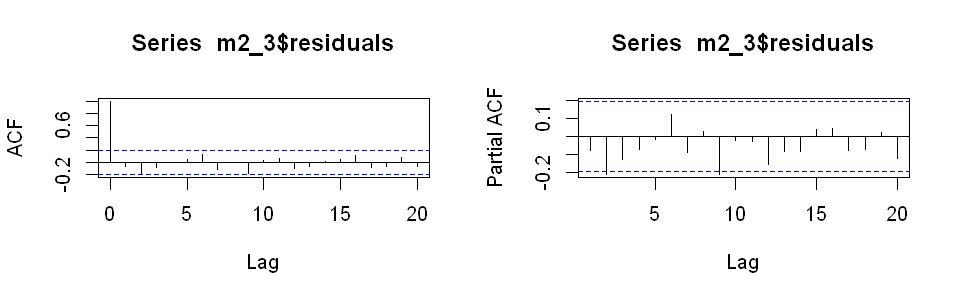

In [11]:
par(mfrow=c(1,2))
acf(m2_3$residuals)
pacf(m2_3$residuals)

## Next series

In [12]:
m3 <- arima(SIM_2$Y3, order = c(2,0,0))
m3


Call:
arima(x = SIM_2$Y3, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.6842  -0.4748    -0.0250
s.e.  0.0872   0.0865     0.0373

sigma^2 estimated as 0.08635:  log likelihood = -19.8,  aic = 47.6

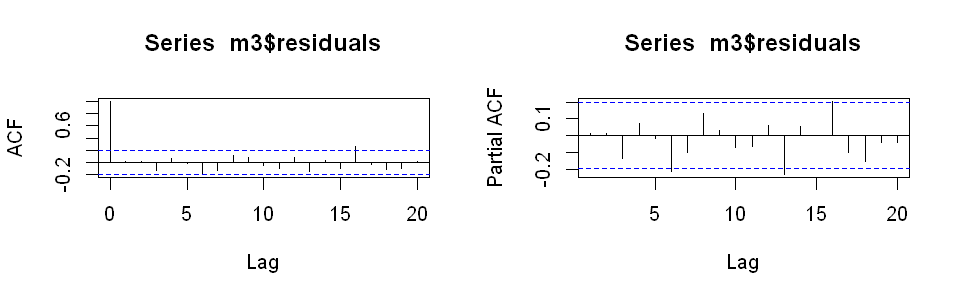

In [13]:
par(mfrow=c(1,2))
acf(m3$residuals)
pacf(m3$residuals)

In [14]:
Box.test(m3$residuals,lag=16,type="Ljung-Box")


	Box-Ljung test

data:  m3$residuals
X-squared = 24.457, df = 16, p-value = 0.07998


There was autocorrelation at lag 16 according to Ljung-Box so we split dataset to control if lag 16 really is somehting

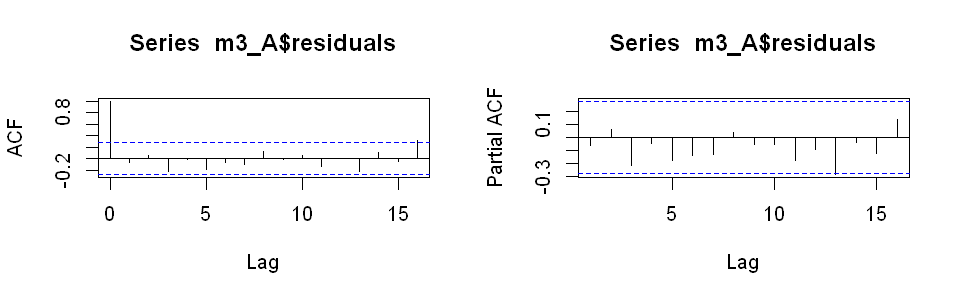

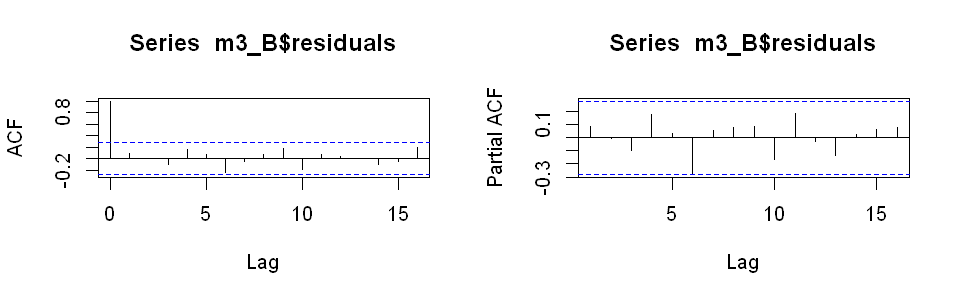

In [15]:
A <- SIM_2$Y3[1:50]
B <- SIM_2$Y3[51:100]

m3_A <- arima(A, order = c(2,0,0))
m3_B <- arima(B, order = c(2,0,0))


par(mfrow=c(1,2))
acf(m3_A$residuals)
pacf(m3_A$residuals)

par(mfrow=c(1,2))
acf(m3_B$residuals)
pacf(m3_B$residuals)

In [16]:
Box.test(m3_B$residuals,lag=16,type="Ljung-Box")


	Box-Ljung test

data:  m3_B$residuals
X-squared = 15.097, df = 16, p-value = 0.5176


Now the Ljung-Box test shows that we can clearly reject autocorrelation at lag 16

## QUARTERLY

In [17]:
library(readxl)
quarterly <- read_excel("Data/quarterly.xls")
head(quarterly)

DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
1961Q2,1.73,2.30,2.94,3.62,3.79,31.47,33.33,29.83,19.23,141.40,966.4,320.97,7.00,23.00,2869.6,2962.9,18.785,32.131


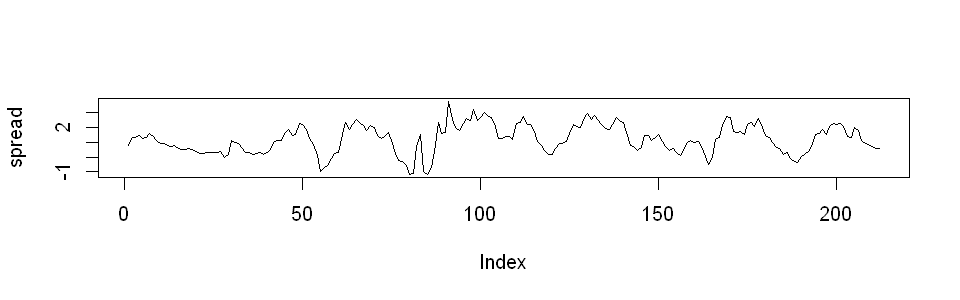

In [18]:
spread <- quarterly$r5 - quarterly$Tbill
plot(spread, type="l")

In [19]:
model <- arima(spread, order = c(2,0,0))
model


Call:
arima(x = spread, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.0407  -0.2157     1.1928
s.e.  0.0669   0.0670     0.1846

sigma^2 estimated as 0.2284:  log likelihood = -145.01,  aic = 298.02

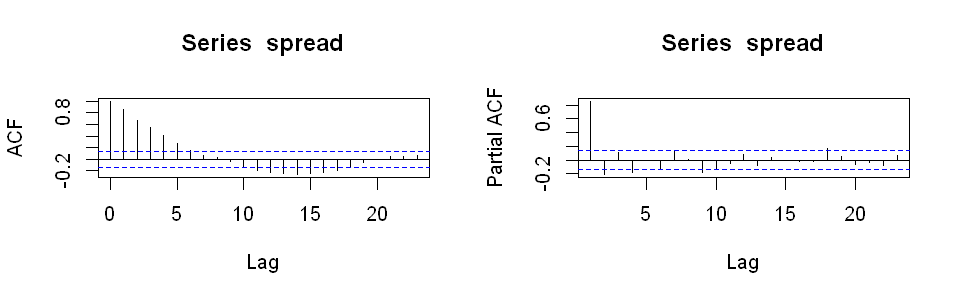

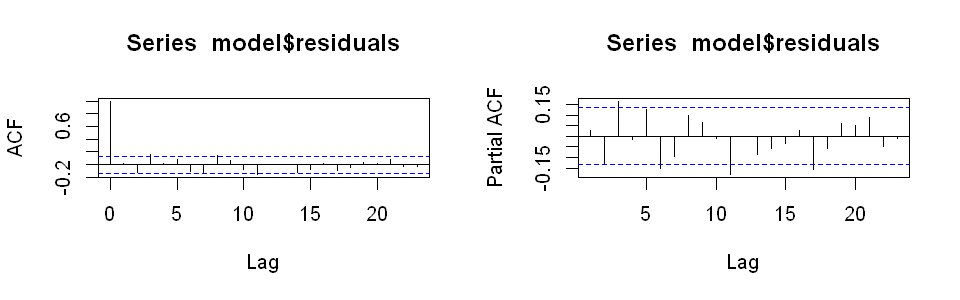

In [20]:
par(mfrow=c(1,2))
acf(spread)
pacf(spread)

par(mfrow=c(1,2))
acf(model$residuals)
pacf(model$residuals)

In [21]:
Box.test(model$residuals, lag=4,type="Ljung-Box")
Box.test(model$residuals, lag=8,type="Ljung-Box")
Box.test(model$residuals, lag=12,type="Ljung-Box")


	Box-Ljung test

data:  model$residuals
X-squared = 8.8824, df = 4, p-value = 0.06411



	Box-Ljung test

data:  model$residuals
X-squared = 21.596, df = 8, p-value = 0.005721



	Box-Ljung test

data:  model$residuals
X-squared = 29.127, df = 12, p-value = 0.003773


In [22]:
auto.arima(spread)
arima(spread, order = c(1,0,4), fixed=c(NA,NA,0,NA,0,NA))
arima(spread, order = c(2,0,7), fixed=c(NA,NA,NA,0,0,0,0,0,NA,0))

Series: spread 
ARIMA(1,0,4) with non-zero mean 

Coefficients:
         ar1     ma1     ma2     ma3     ma4    mean
      0.6861  0.4037  0.0046  0.2591  0.1378  1.1933
s.e.  0.1094  0.1188  0.1169  0.1240  0.1006  0.1803

sigma^2 estimated as 0.2206:  log likelihood=-138.41
AIC=290.82   AICc=291.37   BIC=314.32


Call:
arima(x = spread, order = c(1, 0, 4), fixed = c(NA, NA, 0, NA, 0, NA))

Coefficients:
         ar1     ma1  ma2     ma3  ma4  intercept
      0.7368  0.3679    0  0.1500    0     1.1928
s.e.  0.0519  0.0753    0  0.0625    0     0.1818

sigma^2 estimated as 0.2172:  log likelihood = -139.77,  aic = 289.55


Call:
arima(x = spread, order = c(2, 0, 7), fixed = c(NA, NA, NA, 0, 0, 0, 0, 0, NA, 
    0))

Coefficients:
         ar1     ar2     ma1  ma2  ma3  ma4  ma5  ma6      ma7  intercept
      0.3942  0.5106  0.8086    0    0    0    0    0  -0.1370          0
s.e.  0.1177  0.1148  0.0849    0    0    0    0    0   0.0382          0

sigma^2 estimated as 0.2204:  log likelihood = -141.96,  aic = 293.92

In [23]:
a <- arima(spread, order=c(2,0,1))

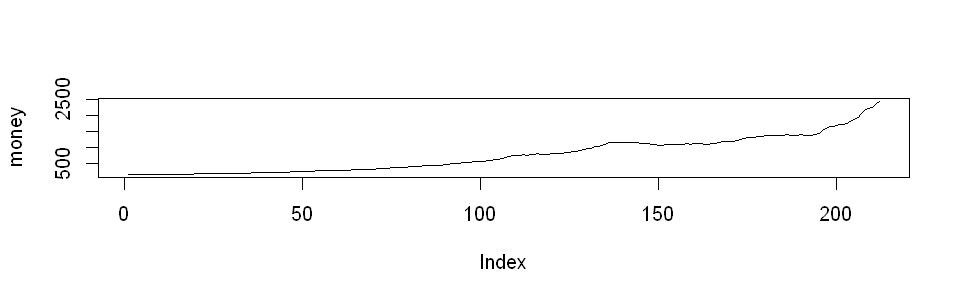

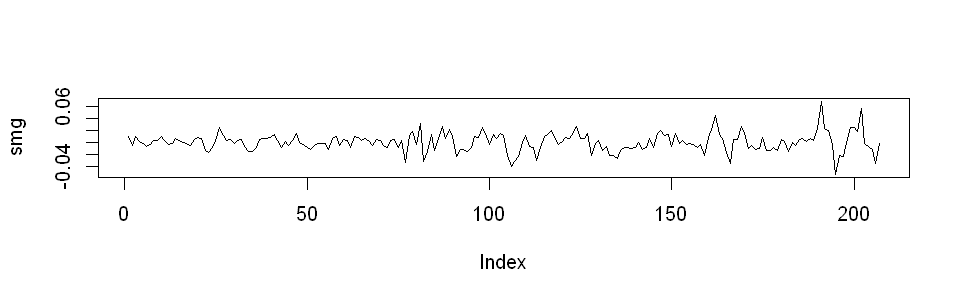

In [24]:
money <- quarterly$M1NSA
smg <- diff(diff(log(quarterly$M1NSA),4))
plot(money, type="l")
plot(smg, type="l")

ERROR: Error in as.ts(x): objekt 'money_2' blev ikke fundet


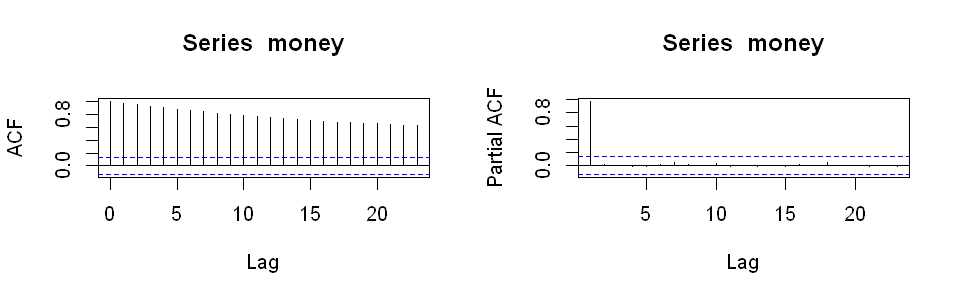

In [25]:
par(mfrow=c(1,2))
acf(money)
pacf(money)

par(mfrow=c(1,2))
acf(money_2)
pacf(money_2)

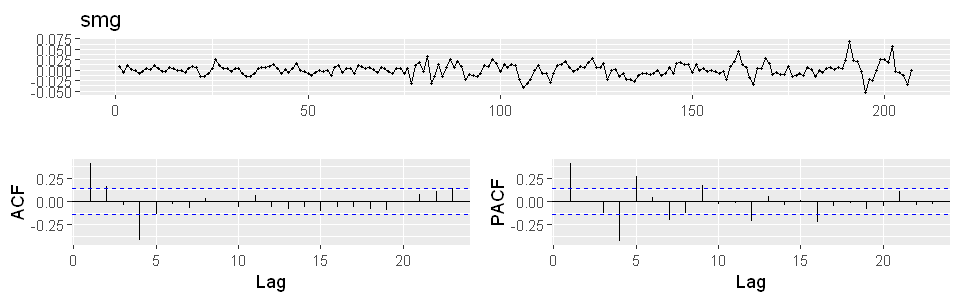

In [26]:
ggtsdisplay(smg)


In [35]:
smg <- diff(diff(log(quarterly$M1NSA),4))

money_m1 <- arima(smg, order = c(1,0,4), fixed=c(NA,0,0,0,NA,0))
money_m1

money_m2 <- arima(money, order = c(1,1,0), seasonal=list(order=c(0,1,1), period = 4))
money_m2


Call:
arima(x = smg, order = c(1, 0, 4), fixed = c(NA, 0, 0, 0, NA, 0))

Coefficients:
         ar1  ma1  ma2  ma3      ma4  intercept
      0.5493    0    0    0  -0.7566          0
s.e.  0.0594    0    0    0   0.0520          0

sigma^2 estimated as 0.0001251:  log likelihood = 634.56,  aic = -1263.13


Call:
arima(x = money, order = c(1, 1, 0), seasonal = list(order = c(0, 1, 1), period = 4))

Coefficients:
         ar1     sma1
      0.6285  -0.6884
s.e.  0.0608   0.0722

sigma^2 estimated as 173.2:  log likelihood = -828.6,  aic = 1663.2

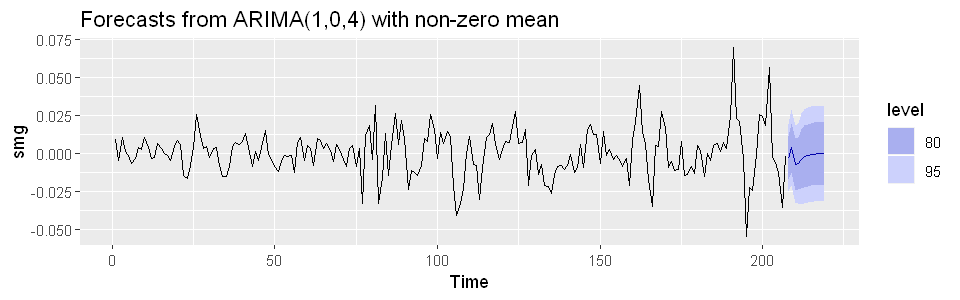

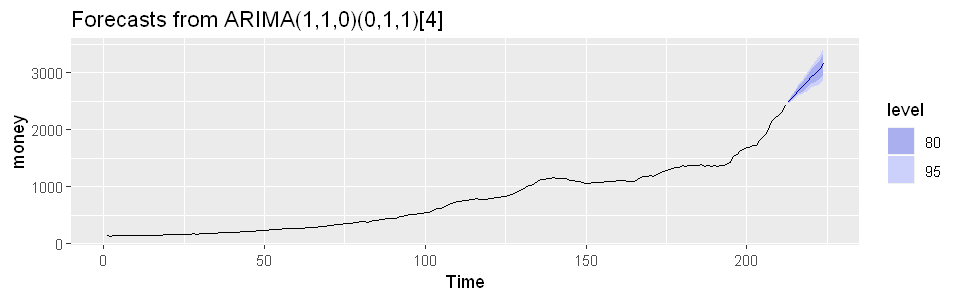

In [28]:
autoplot(forecast(money_m1, h=12))
autoplot(forecast(money_m2, h=12))

In [29]:
autoplot(forecast(fit, h=12))


ERROR: Error in forecast(fit, h = 12): objekt 'fit' blev ikke fundet


In [ ]:
money_spec <- arfimaspec(mean.model = list(armaOrder = c(4,4), include.mean = TRUE),
                         fixed.pars = list(ar2 = 0, ar3 = 0, ar4 = 0, ma1 = 0, ma2 = 0, ma3 = 0))

money_m1 <- arfimafit(spec = money_spec, data = smg, solver = "nlminb")
money_m1

In [ ]:

arima(diff(log(money),1), order=c(2,0,0), include.mean=F)
arima(money, order=c(2,1,0), include.mean=F)


In [ ]:
acf(money_m1$residuals^2)